In [2]:
# Import Libraries
import sklearn.datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Create Function to display confusion matrix later.

def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    Plots the confusion matrix with labels and percentages.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        classes (list): List of class names.
        cmap (matplotlib colormap, optional): Colormap for the plot. Defaults to plt.cm.Blues.
    """
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    #sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes, alpha=0.5) # Overlay normalized values
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [6]:
# Open Dataset
dataSet = sklearn.datasets.load_iris()

In [20]:
# Check Data
print(dataSet.feature_names)
print(dataSet.data[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [4]:
# Check Targets
print(dataSet.target_names)
print(dataSet.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
# Store data and targets into variables
X = dataSet.data
y = dataSet.target

In [29]:
# Create a train/test split with 50% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=42)

In [30]:
# Create Decision Tree Classifier
DTClassifier = DecisionTreeClassifier()
DTModel = DTClassifier.fit(X_train, y_train)

# Check accuracy of training model
yPredTrain_DT = DTModel.predict(X_train)

print(dataSet.target_names)
print(confusion_matrix(y_train, yPredTrain_DT))
print(classification_report(y_train, yPredTrain_DT))

['setosa' 'versicolor' 'virginica']
[[21  0  0]
 [ 0 27  0]
 [ 0  0 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



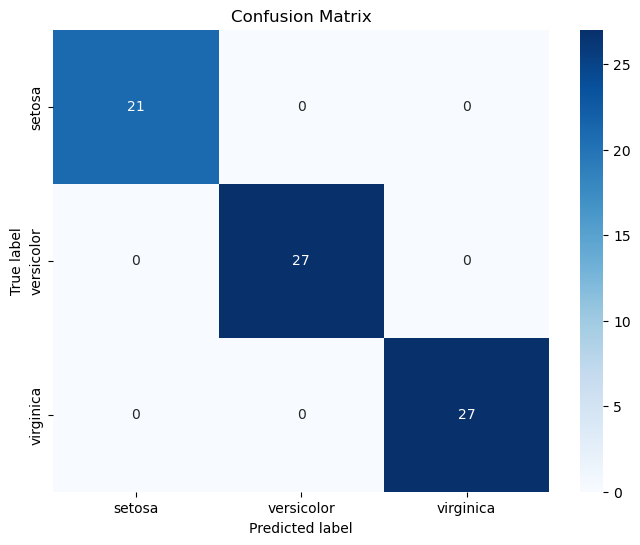

In [33]:
y_true = y_train
y_pred = yPredTrain_DT
classes = dataSet.target_names
plot_confusion_matrix(y_true, y_pred, classes)

In [34]:
# Check accuracy of testing model
yPredTest_DT = DTModel.predict(X_test)

print(dataSet.target_names)
print(confusion_matrix(y_test, yPredTest_DT))
print(classification_report(y_test, yPredTest_DT))

['setosa' 'versicolor' 'virginica']
[[29  0  0]
 [ 0 20  3]
 [ 0  1 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.95      0.87      0.91        23
           2       0.88      0.96      0.92        23

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



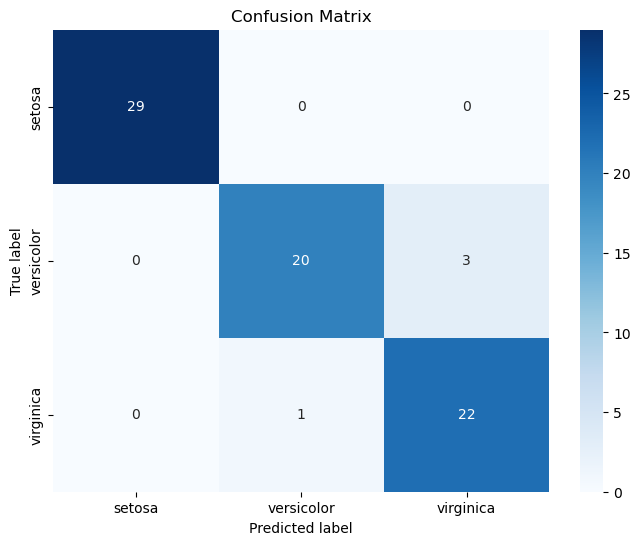

In [35]:
y_true = y_test
y_pred = yPredTest_DT
classes = dataSet.target_names
plot_confusion_matrix(y_true, y_pred, classes)

In [36]:
# Create Naive Bayes Classifier
NBClassifier = GaussianNB()
NBModel = NBClassifier.fit(X_train, y_train)

# Check accuracy of training model
yPredTrain_NB = NBModel.predict(X_train)

print(dataSet.target_names)
print(confusion_matrix(y_train, yPredTrain_NB))
print(classification_report(y_train, yPredTrain_NB))

['setosa' 'versicolor' 'virginica']
[[21  0  0]
 [ 0 24  3]
 [ 0  3 24]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.89      0.89      0.89        27
           2       0.89      0.89      0.89        27

    accuracy                           0.92        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.92      0.92      0.92        75

